In [ ]:
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import collections

In [ ]:
mu = 5
loc = 10
x = np.arange(0, loc+1)
muestra_po = poisson.rvs(mu, size = 1000)

In [ ]:
unique, counts = np.unique(muestra_po, return_counts=True)
print(dict(zip(unique, counts)))

{0: 5, 1: 33, 2: 86, 3: 133, 4: 172, 5: 178, 6: 142, 7: 112, 8: 63, 9: 49, 10: 11, 11: 11, 12: 5}


In [ ]:
po = poisson.pmf(x,mu)
po

array([0.00673795, 0.03368973, 0.08422434, 0.1403739 , 0.17546737,
       0.17546737, 0.14622281, 0.10444486, 0.06527804, 0.03626558,
       0.01813279])

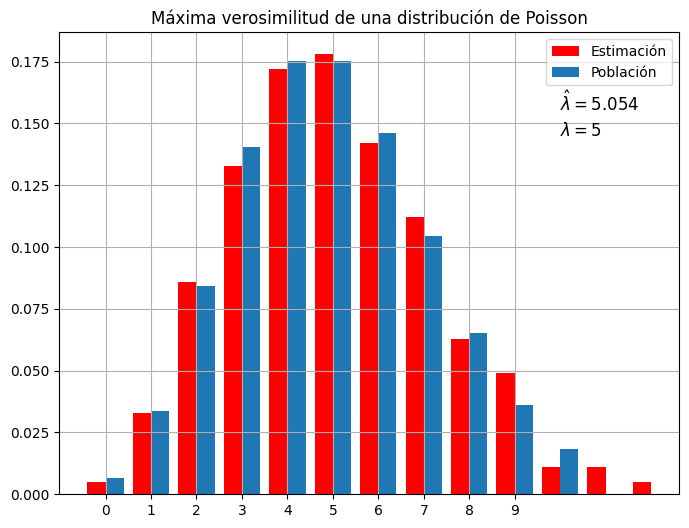

In [ ]:
po = poisson.pmf(x,mu)

plt.figure(figsize=(8,6))

plt.title("Máxima verosimilitud de una distribución de Poisson")
width =0.4
#width = 0.40
#plt.bar(x, po,  width, color = 'r',label = 'Estimación', alpha = 1)
plt.bar(unique-0.2, counts/1000,  width, color = 'r',label = 'Estimación', alpha = 1)
plt.bar(x+0.2, po, width, label = 'Población', alpha = 1)
#plt.vlines(x, 0, po, colors = 'b', lw = 30, alpha = 0.5)
#for i in x:
#  plt.text(x[i]-0.3, po[i]+0.003, round(po[i], 4))
plt.text(10, 0.155, r'$\hat{\lambda} = %s$' %(np.round(muestra_po.mean(), 4)), fontsize = 12)
plt.text(10, 0.145, r'$\lambda = %s$' %(np.round(mu , 4)), fontsize = 12)
plt.xticks(np.arange(0, 10, step=1), minor = False)
#plt.vlines(x, 0, muestra_bin, colors = 'b', lw = 30, alpha = 0.5)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
n = 10
p = 0.3
x = np.arange(0, n+1)
muestra_bin = binom.rvs(n, p, size = 1000)

In [ ]:
unique, counts = np.unique(muestra_bin, return_counts=True)
print(dict(zip(unique, counts)))

{0: 31, 1: 120, 2: 240, 3: 280, 4: 193, 5: 95, 6: 34, 7: 6, 8: 1}


In [ ]:
np.unique(muestra_bin)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
muestra_bin.mean()/n

0.2941

In [ ]:
binom.pmf(x, n, p)

array([2.82475249e-02, 1.21060821e-01, 2.33474441e-01, 2.66827932e-01,
       2.00120949e-01, 1.02919345e-01, 3.67569090e-02, 9.00169200e-03,
       1.44670050e-03, 1.37781000e-04, 5.90490000e-06])

In [ ]:
dist = [binom.pmf(r, n, p) for r in x ]


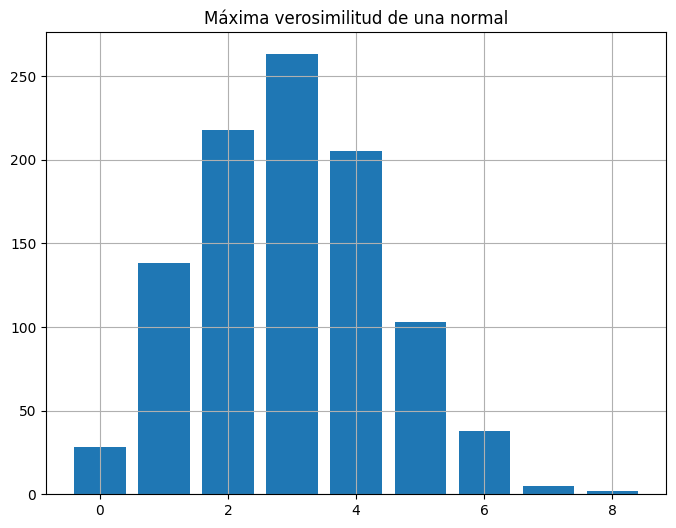

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Máxima verosimilitud de una normal")
plt.bar(unique, counts)
#plt.xlim(xmin = 200, xmax = 400)
#plt.text(8.5, 0.25, r'$\bar{x} = %s$' %(np.round(muestra_bin.mean(), 4)), fontsize = 12)
#plt.text(8.5, 0.22, r'$\bar{x} = %s$' %(np.round(dist[3] , 4)), fontsize = 12)
#plt.vlines(x, 0, muestra_bin, colors = 'b', lw = 30, alpha = 0.5)
plt.grid(True)
plt.show()

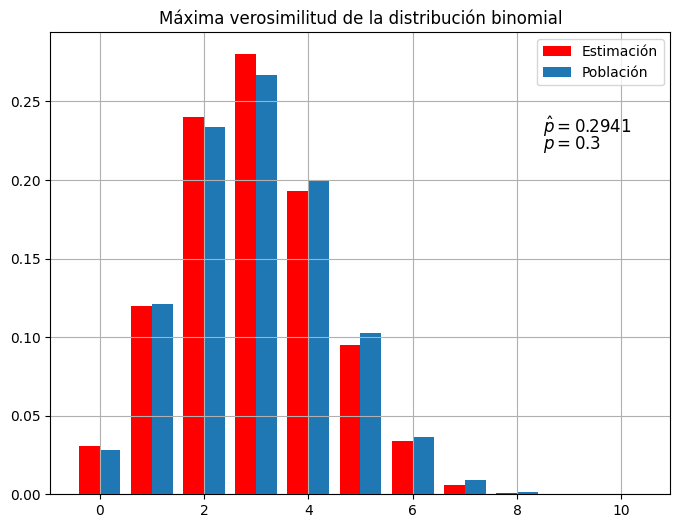

In [ ]:
#x = np.linspace(-2,12,1000)
#fitted = binom.ppf(muestra_bin, n, p,)
#muestra_bin = binom.pmf(x,n,p)
dist = [binom.pmf(r, n, p) for r in x ]

plt.figure(figsize=(8,6))
plt.title("Máxima verosimilitud de la distribución binomial")
width = 0.40
plt.bar(unique-0.2, counts/1000,  width, color = 'r',label = 'Estimación', alpha = 1)
plt.bar(x+0.2, dist, width, label = 'Población', alpha = 1)
#plt.xlim(xmin = 200, xmax = 400)
plt.text(8.5, 0.23, r'$\hat{p} = %s$' %(np.round(muestra_bin.mean()/n, 4)), fontsize = 12)
plt.text(8.5, 0.22, r'$p = %s$' %(np.round(p , 4)), fontsize = 12)
#plt.vlines(x, 0, muestra_bin, colors = 'b', lw = 30, alpha = 0.5)
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
muestra_normal = norm.rvs(loc = 5, scale = 1, size = 1000)

In [ ]:
params = norm.fit(muestra_normal)
#print("Media = {mu}".format(mu=params[0]))
#print("Desviacion tipica = {sd}".format(sd=params[1]))
params

(5.055321361680083, 0.9538194971256152)

In [ ]:
x = np.linspace(-2,12,100)
pdf_fitted = norm.pdf(x, loc=params[0], scale=params[1])
pdf_original = norm.pdf(x, loc=5, scale=1)

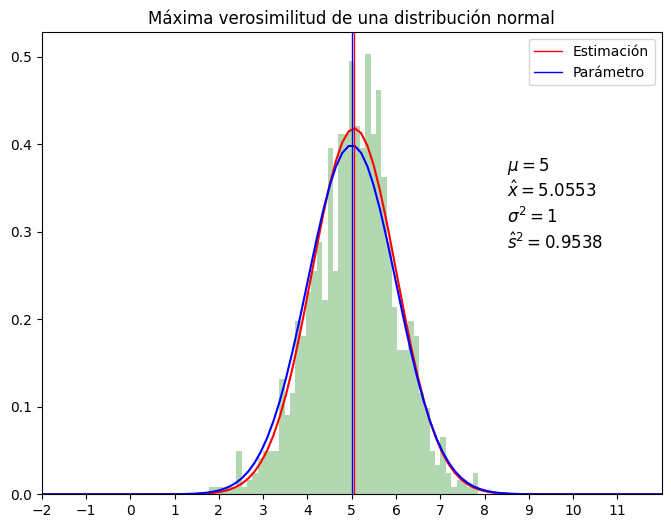

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Máxima verosimilitud de una distribución normal")
plt.plot(x, pdf_fitted, 'r-', x, pdf_original, 'b-')
plt.hist( muestra_normal, bins = 50,density=True, alpha=0.3, color = 'g')
plt.xlim(xmin = -2, xmax = 12)
plt.axvline(params[0], color='r', linewidth=1, label = 'Estimación')
plt.axvline(5, color='b', linewidth=1, label = 'Parámetro')
plt.legend()
plt.xticks(np.arange(-2, 12, step=1), minor = False)
plt.text(8.5, 0.37, r'$\mu = %s$' %(5), fontsize = 12)
plt.text(8.5, 0.34, r'$\hat{x} = %s$' %(np.round(params[0], 4)), fontsize = 12)
plt.text(8.5, 0.31, r'$\sigma^{2} = %s$' %(1), fontsize = 12)
plt.text(8.5, 0.28, r'$\hat{s}^{2} = %s$' %(np.round(params[1], 4)), fontsize = 12)

plt.show()